### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

### Load data

In [7]:
df = pd.read_csv("A_Z Handwritten Data.csv")
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualisation

In [8]:
letters_counts = df['0'].value_counts().sort_index()

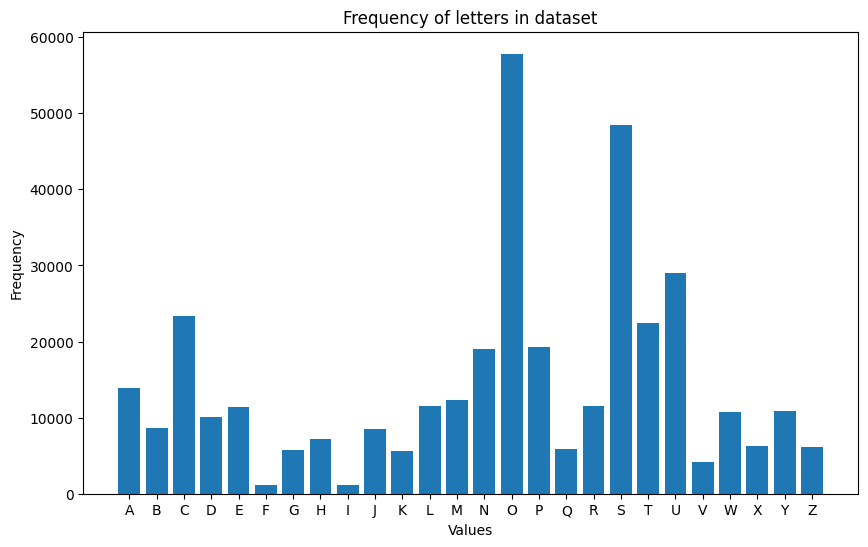

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(letters_counts.index, letters_counts.values)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of letters in dataset')
plt.xticks(list(range(26)), string.ascii_uppercase)
plt.show()

In [10]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)

# get labels
x = df.drop('0', axis = 1)
y = df['0']

In [11]:
# normalize inputs from <0,255> to <0,1>
x /= 255.

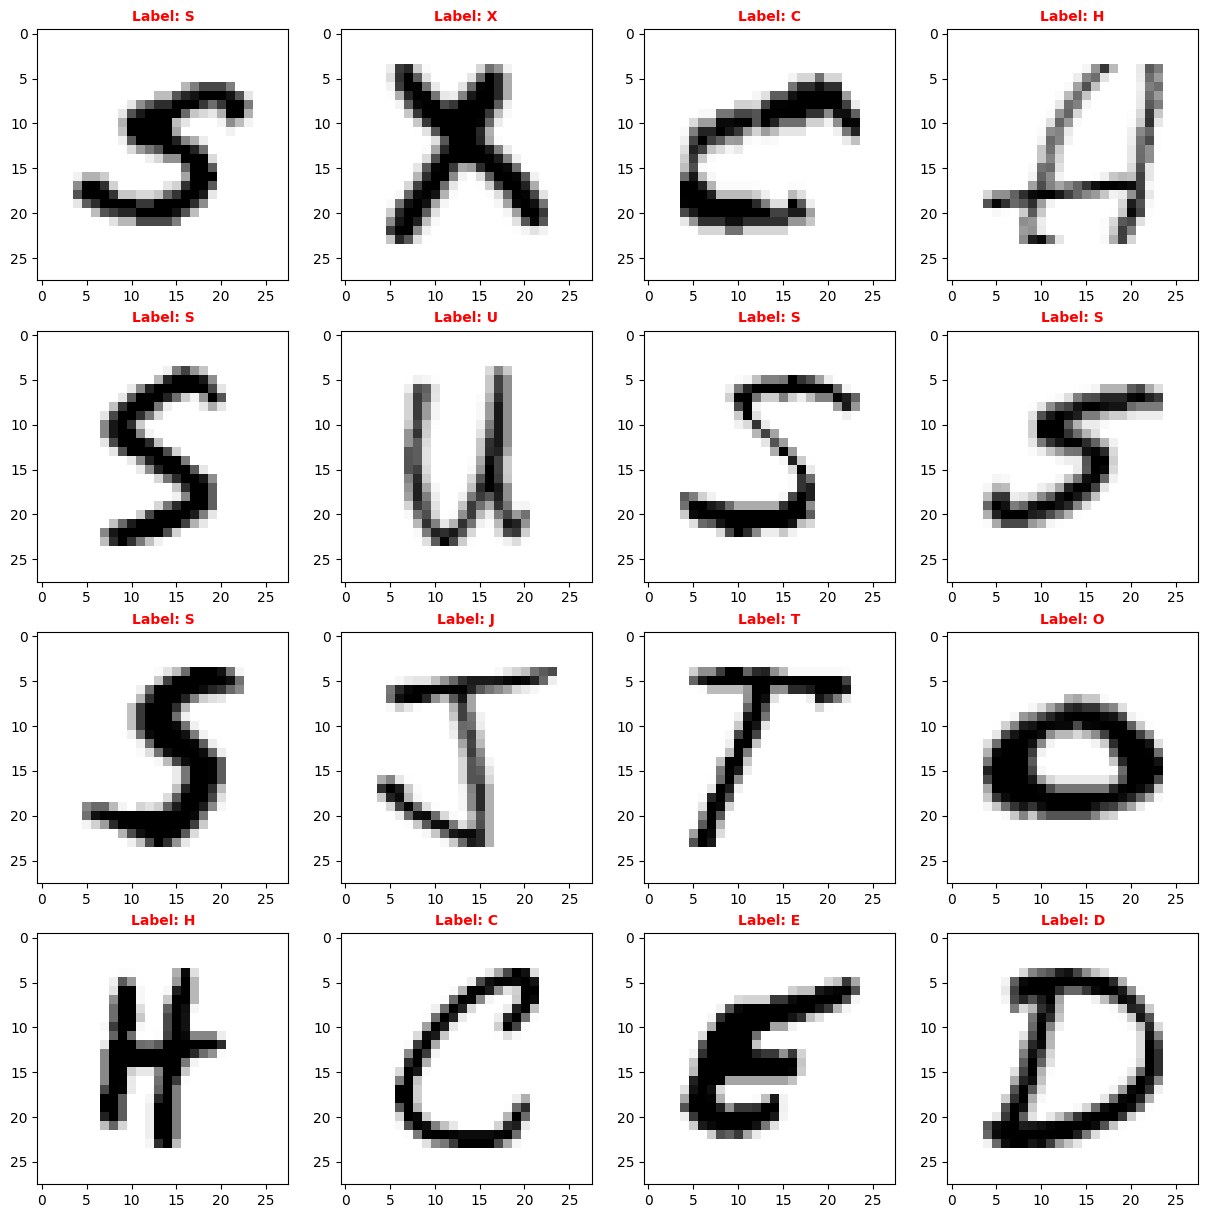

In [12]:
# plot a few samples
fig, ax = plt.subplots(4, 4, figsize = (15, 15))
axes = ax.flatten()

for i in range(16):
    axes[i].imshow(np.reshape(x.iloc[i].values, (28, 28)), cmap = 'Greys')
    axes[i].set_title("Label: " + chr(y.iloc[i] + 65), fontsize = 10, fontweight = 'bold', color = 'red')
plt.show()

### Model

In [13]:
# divide dataset to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# reshape data for input layer
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28, 1))

print('Train data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

Train data shape: (297960, 28, 28, 1)
Test data shape: (74490, 28, 28, 1)


In [14]:
y_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("Train labels shape:", y_train.shape)

y_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("Test labels shape:", y_test.shape)

Train labels shape: (297960, 26)
Test labels shape: (74490, 26)


In [15]:
# define model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))

model.add(Dense(26, activation = "softmax"))

2024-03-01 22:04:37.474080: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-03-01 22:04:37.474101: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: vivobookpro15
2024-03-01 22:04:37.474104: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: vivobookpro15
2024-03-01 22:04:37.474245: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.154.5
2024-03-01 22:04:37.474256: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.154.5
2024-03-01 22:04:37.474258: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.154.5


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [17]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

In [18]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
9312/9312 [==============================] - 55s 6ms/step - loss: 0.1419 - accuracy: 0.9599 - val_loss: 0.0750 - val_accuracy: 0.9788
Epoch 2/20
9312/9312 [==============================] - 55s 6ms/step - loss: 0.0578 - accuracy: 0.9841 - val_loss: 0.0481 - val_accuracy: 0.9869
Epoch 3/20
9312/9312 [==============================] - 56s 6ms/step - loss: 0.0436 - accuracy: 0.9882 - val_loss: 0.0465 - val_accuracy: 0.9866
Epoch 4/20
9312/9312 [==============================] - 58s 6ms/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0385 - val_accuracy: 0.9897
Epoch 5/20
9312/9312 [==============================] - 58s 6ms/step - loss: 0.0302 - accuracy: 0.9915 - val_loss: 0.0467 - val_accuracy: 0.9880
Epoch 6/20
9312/9312 [==============================] - 56s 6ms/step - loss: 0.0263 - accuracy: 0.9925 - val_loss: 0.0389 - val_accuracy: 0.9895
Epoch 7/20
9312/9312 [==============================] - 59s 6ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0377 - val_ac

In [19]:
scores = model.evaluate(x_test, y_test)

2328/2328 [==============================] - 5s 2ms/step - loss: 0.0369 - accuracy: 0.9914


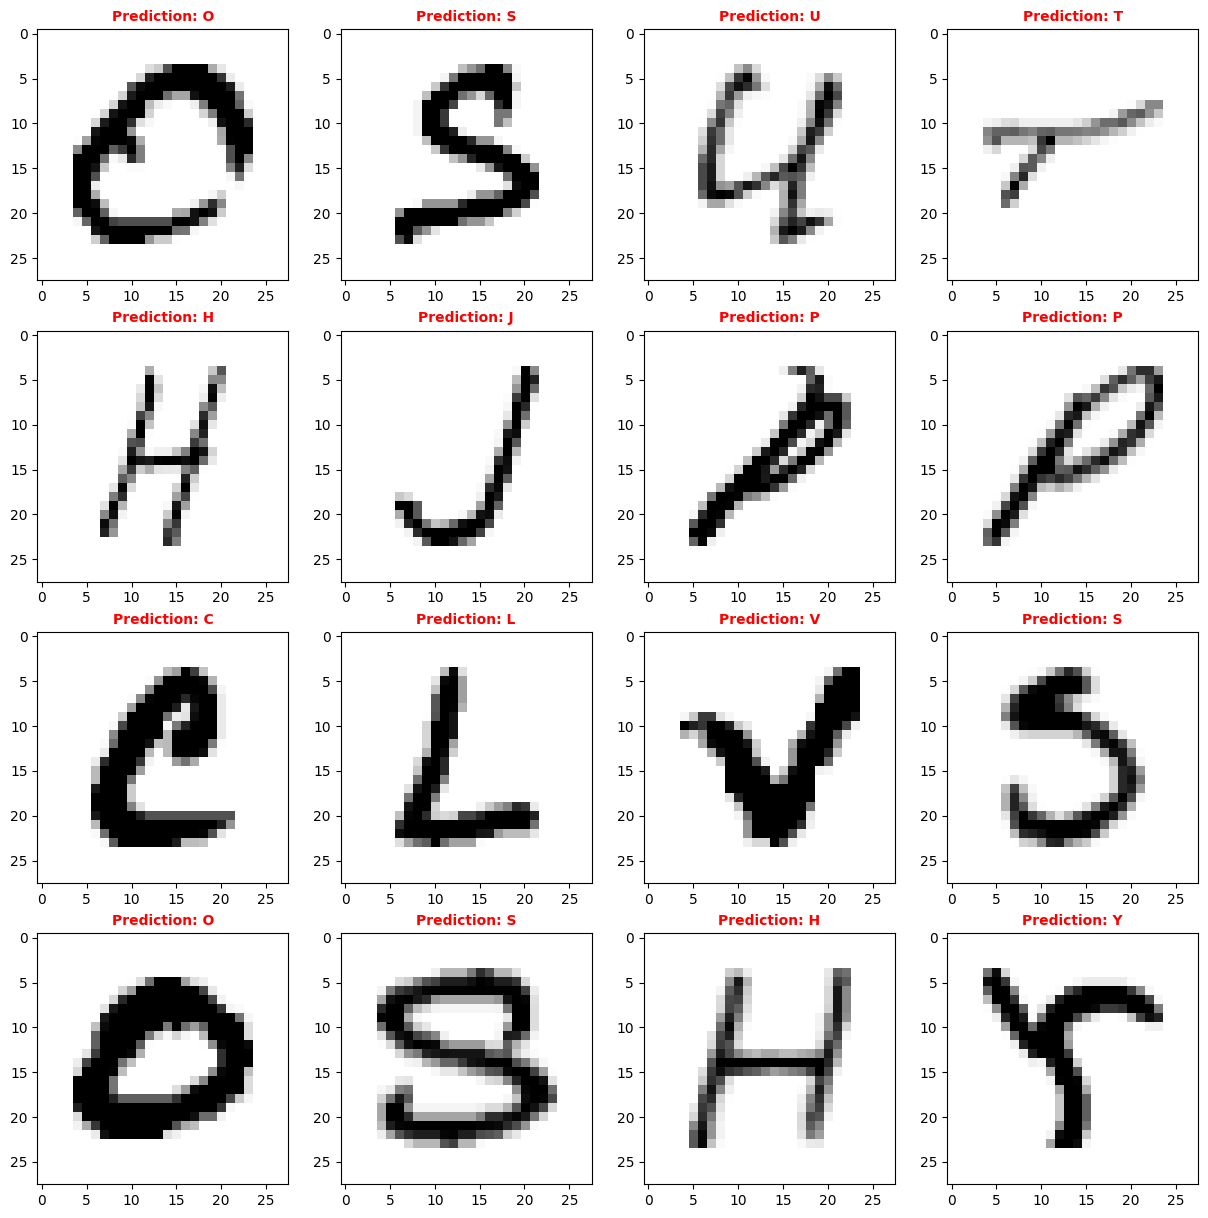

In [20]:
# plot a few examples of model predictions

fig, ax = plt.subplots(4, 4, figsize = (15, 15))
axes = ax.flatten()

for i in range(16):
    pred = np.argmax(y_test[i])
    
    axes[i].imshow(np.reshape(x_test[i], (28, 28)), cmap = 'Greys')
    axes[i].set_title("Prediction: " + chr(pred + 65), fontsize = 10, fontweight = 'bold', color = 'red')
plt.show()

### Confusion Matrix

In [21]:
y_pred = model.predict(x_test)

2328/2328 [==============================] - 6s 2ms/step


Text(0.5, 0.98, 'Confusion matrix')

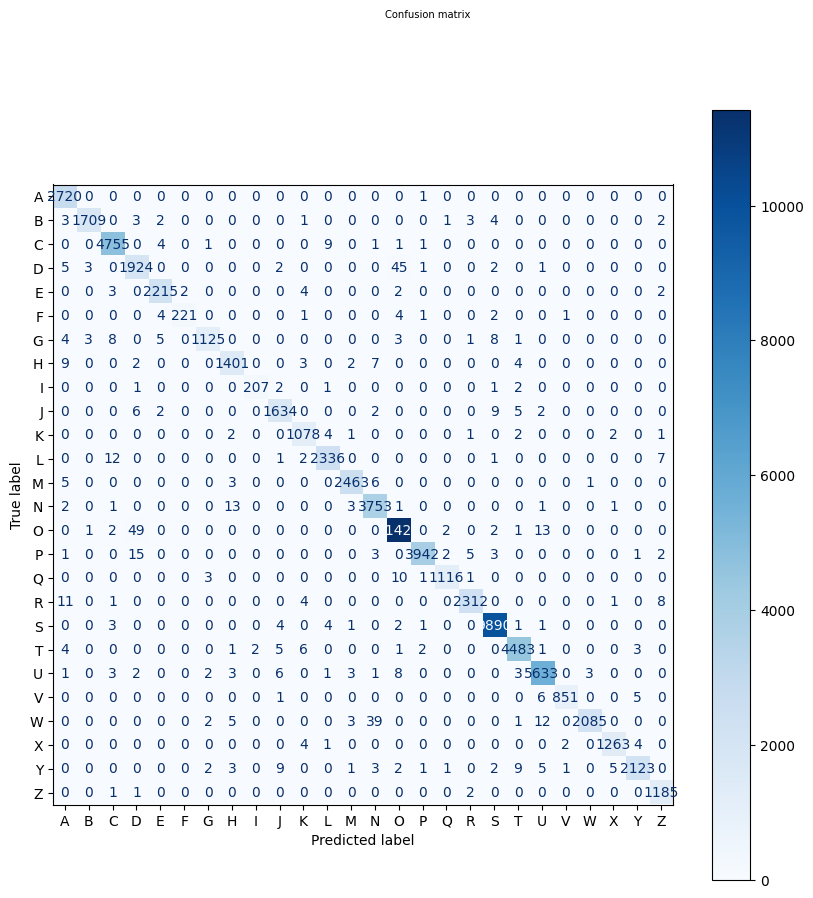

In [23]:
y_pred = np.argmax(y_pred, axis = 1)
y_true = np.where(y_test == 1)[1]

labels = [chr(i + 65) for i in range(26)]
disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, cmap=plt.cm.Blues)

fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 
plt.rcParams.update({'font.size': 6})
fig.suptitle('Confusion matrix')